<a href="https://colab.research.google.com/github/EugeneDyw/Stat6289/blob/main/HW3/TSLA1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense
import matplotlib.pyplot as plt

file_path='/content/drive/MyDrive/Colab Notebooks/6289HW3/TSLA.csv'
# Load data from the provided CSV file and parse dates
data = pd.read_csv(file_path, parse_dates=True, index_col="Date")
#data


In [7]:
# Create dataset function
def create_dataset(dataset, look_back):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        a = dataset.iloc[i:(i + look_back), 0]  # assuming 'Close' column is the first
        dataX.append(a)
        dataY.append(dataset.iloc[i + look_back, 0])  # target is the 'Close' value after the look_back period
    return np.array(dataX), np.array(dataY)


1. Use a LSTM model with 2 layers, batch size=32 to see which time lag performs better

In [8]:
def train_lstm_model(X_train, y_train, units=256, hidden_layers=2, batch_size=32, epochs=10):
    model_lap = Sequential()

    # First LSTM layer
    model_lap.add(LSTM(units, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
    model_lap.add(Dropout(0.5))


    for _ in range(hidden_layers - 1):
        model_lap.add(LSTM(units, activation='relu', return_sequences=True if _ < hidden_layers - 2 else False))
        model_lap.add(Dropout(0.5))


    model_lap.add(Dense(1))
    # Compile model
    model_lap.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error')
    history = model_lap.fit(X_train, y_train, epochs=epochs, batch_size=batch_size)
    return model_lap, history


Epoch 1/10
32/32 [==============================] - 4s 9ms/step - loss: 0.0114
Epoch 2/10
32/32 [==============================] - 0s 8ms/step - loss: 0.0088
Epoch 3/10
32/32 [==============================] - 0s 9ms/step - loss: 0.0064
Epoch 4/10
32/32 [==============================] - 0s 8ms/step - loss: 0.0042
Epoch 5/10
32/32 [==============================] - 0s 9ms/step - loss: 0.0027
Epoch 6/10
32/32 [==============================] - 0s 9ms/step - loss: 0.0019
Epoch 7/10
32/32 [==============================] - 0s 9ms/step - loss: 0.0017
Epoch 8/10
32/32 [==============================] - 0s 9ms/step - loss: 0.0017
Epoch 9/10
32/32 [==============================] - 0s 9ms/step - loss: 0.0016
Epoch 10/10
8/8 [==============================] - 0s 3ms/step


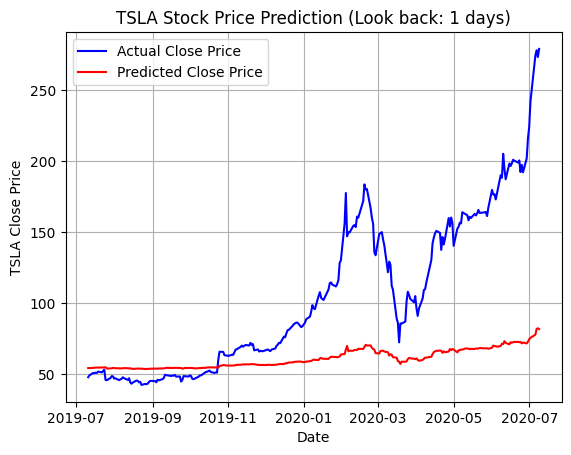

Epoch 1/10
32/32 [==============================] - 5s 59ms/step - loss: 0.0085
Epoch 2/10
32/32 [==============================] - 1s 31ms/step - loss: 0.0017
Epoch 3/10
32/32 [==============================] - 1s 29ms/step - loss: 0.0011
Epoch 4/10
32/32 [==============================] - 1s 28ms/step - loss: 6.9192e-04
Epoch 5/10
32/32 [==============================] - 1s 28ms/step - loss: 4.0050e-04
Epoch 6/10
32/32 [==============================] - 1s 27ms/step - loss: 3.2476e-04
Epoch 7/10
32/32 [==============================] - 1s 28ms/step - loss: 3.1566e-04
Epoch 8/10
32/32 [==============================] - 1s 28ms/step - loss: 2.9648e-04
Epoch 9/10
32/32 [==============================] - 1s 29ms/step - loss: 3.1736e-04
Epoch 10/10
8/8 [==============================] - 0s 5ms/step


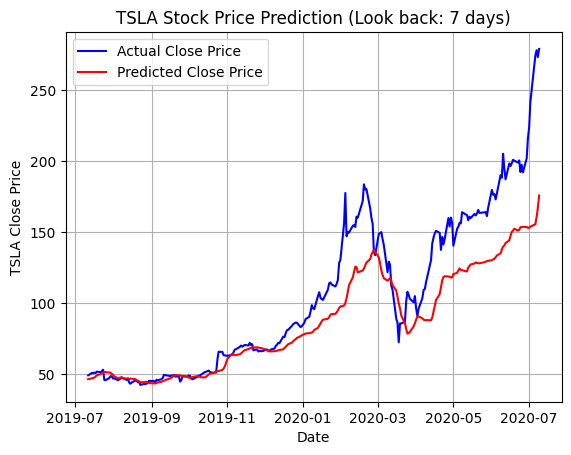

Epoch 1/10
32/32 [==============================] - 6s 64ms/step - loss: 0.0067
Epoch 2/10
32/32 [==============================] - 2s 48ms/step - loss: 0.0011
Epoch 3/10
32/32 [==============================] - 2s 50ms/step - loss: 7.3950e-04
Epoch 4/10
32/32 [==============================] - 2s 50ms/step - loss: 5.1464e-04
Epoch 5/10
32/32 [==============================] - 2s 54ms/step - loss: 3.9516e-04
Epoch 6/10
32/32 [==============================] - 2s 47ms/step - loss: 3.8626e-04
Epoch 7/10
32/32 [==============================] - 2s 78ms/step - loss: 3.9768e-04
Epoch 8/10
32/32 [==============================] - 3s 88ms/step - loss: 3.7644e-04
Epoch 9/10
32/32 [==============================] - 2s 52ms/step - loss: 3.4656e-04
Epoch 10/10
8/8 [==============================] - 0s 7ms/step


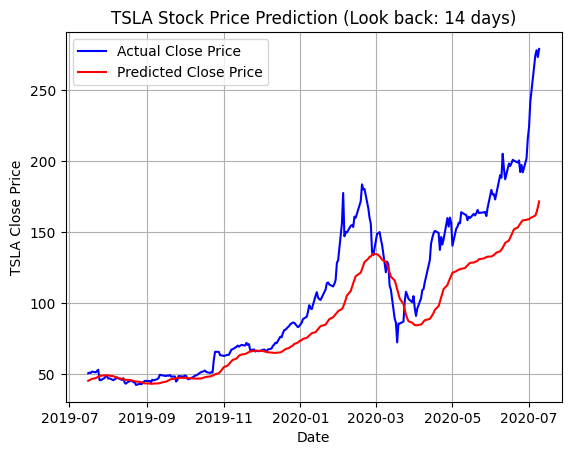

In [10]:
# List of look_back values to compare
look_back_values = [1, 7, 14]

# Iterate over each look_back value
for look_back in look_back_values:

    # Prepare dataset
    X, Y = create_dataset(data[['Close']], look_back)

      # Initialize and fit the scalers for each iteration
    X_scaler = MinMaxScaler()
    X_normalized = X_scaler.fit_transform(X)

    Y_scaler = MinMaxScaler()
    Y_normalized = Y_scaler.fit_transform(Y.reshape(-1, 1))

    X_train, X_test, y_train, y_test = train_test_split(X_normalized[:, :, np.newaxis], Y_normalized, test_size=0.2, shuffle=False)

    #histories={}
    epochs=30
    # Train the LSTM model and store the training history
    model_lap, history = train_lstm_model(X_train, y_train, units=256, hidden_layers=2, batch_size=32, epochs=10)

    #histories[look_back] = history.history['loss']

    # Storing the history
    #histories[look_back] = history.history['loss']

    # Predict prices
    predicted_prices = model_lap.predict(X_test)
    predicted_closing_prices = Y_scaler.inverse_transform(predicted_prices)
    actual_closing_prices = Y_scaler.inverse_transform(y_test)

    # Results DataFrame
    results_df = pd.DataFrame({
        'Actual_Close_Price': actual_closing_prices.flatten(),
        'Predicted_Close_Price': predicted_closing_prices.flatten()
    })

    # Visualization
    plt.title(f'TSLA Stock Price Prediction (Look back: {look_back} days)')
    plt.plot(data.index[look_back:][len(X_train):], actual_closing_prices, label='Actual Close Price', color='b')
    plt.plot(data.index[look_back:][len(X_train):], predicted_closing_prices, label='Predicted Close Price', color='r')
    plt.xlabel('Date')
    plt.ylabel('TSLA Close Price')
    plt.grid(True)
    plt.legend()
    plt.show()

    #plt.title(f'Loss over epochs (Look back: {look_back} days)')
    #plt.plot(range(1,31), history.history['loss'])
    #plt.xlabel('Epoch')
    #plt.ylabel('Loss')
    #plt.grid(True)
    #plt.show()


Use time lag=7 to compare different models

In [11]:

#Time lag can be changed to 1 or 14 days. Use 7 here since it performs best
look_back = 7
X, Y = create_dataset(data[['Close']], look_back)

# Normalize the data
X_scaler = MinMaxScaler()
X_normalized = X_scaler.fit_transform(X)

Y_scaler = MinMaxScaler()
Y_normalized = Y_scaler.fit_transform(Y.reshape(-1, 1))

# Reshape the input data for LSTM: [samples, time steps, features]
#X_train, X_test, y_train, y_test = train_test_split(X_normalized[:, :, np.newaxis], Y_normalized, test_size=0.2, shuffle=False)

#print('x_train shape:', X_train.shape)
#print(X_train.shape[0], 'train samples')
#print(X_test.shape[0], 'test samples')

# First, split data into training + validation and test data
X_temp, X_test, y_temp, y_test = train_test_split(X_normalized[:, :, np.newaxis], Y_normalized, test_size=0.2, shuffle=False)

# Second, split training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, shuffle=False)

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_val.shape[0], 'validation samples')
print(X_test.shape[0], 'test samples')


X_train shape: (750, 7, 1)
750 train samples
251 validation samples
251 test samples


Train models with different hidden layers(1, 2 or 4) and different batch size(64, 32 or 16)

Visualize the result

Epoch 1/30
12/12 [==============================] - 9s 171ms/step - loss: 0.0106 - val_loss: 0.0113
Epoch 2/30
12/12 [==============================] - 1s 72ms/step - loss: 0.0072 - val_loss: 0.0066
Epoch 3/30
12/12 [==============================] - 1s 72ms/step - loss: 0.0037 - val_loss: 0.0021
Epoch 4/30
12/12 [==============================] - 1s 70ms/step - loss: 0.0023 - val_loss: 0.0013
Epoch 5/30
12/12 [==============================] - 1s 74ms/step - loss: 0.0022 - val_loss: 0.0018
Epoch 6/30
12/12 [==============================] - 1s 74ms/step - loss: 0.0022 - val_loss: 0.0018
Epoch 7/30
12/12 [==============================] - 1s 72ms/step - loss: 0.0021 - val_loss: 0.0015
Epoch 8/30
12/12 [==============================] - 1s 68ms/step - loss: 0.0021 - val_loss: 0.0015
Epoch 9/30
12/12 [==============================] - 1s 73ms/step - loss: 0.0020 - val_loss: 0.0015
Epoch 10/30
12/12 [==============================] - 1s 72ms/step - loss: 0.0019 - val_loss: 0.0013
Epoch 11

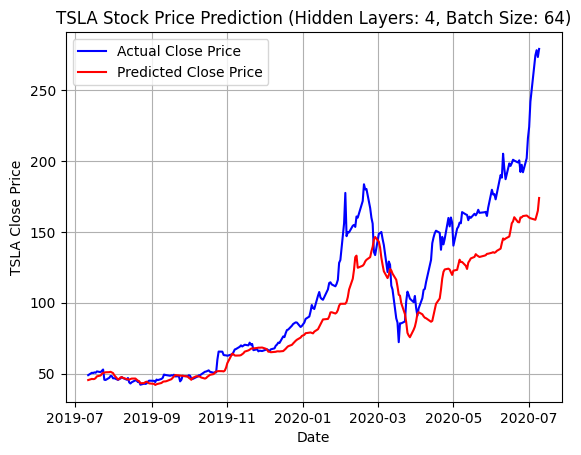

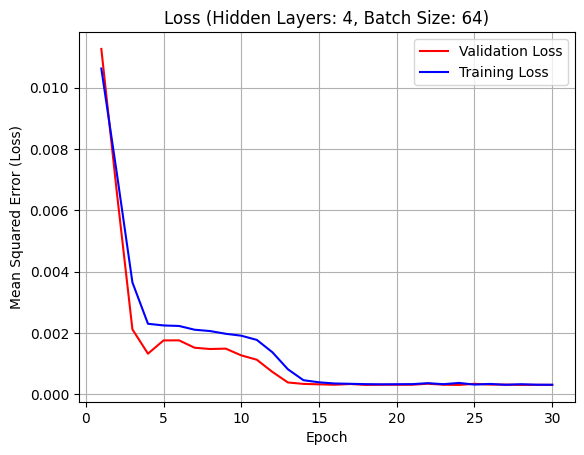

Epoch 1/30
12/12 [==============================] - 5s 83ms/step - loss: 0.0106 - val_loss: 0.0112
Epoch 2/30
12/12 [==============================] - 1s 45ms/step - loss: 0.0072 - val_loss: 0.0066
Epoch 3/30
12/12 [==============================] - 1s 51ms/step - loss: 0.0037 - val_loss: 0.0021
Epoch 4/30
12/12 [==============================] - 1s 45ms/step - loss: 0.0018 - val_loss: 9.6095e-04
Epoch 5/30
12/12 [==============================] - 1s 49ms/step - loss: 0.0017 - val_loss: 0.0011
Epoch 6/30
12/12 [==============================] - 1s 47ms/step - loss: 0.0014 - val_loss: 0.0011
Epoch 7/30
12/12 [==============================] - 1s 54ms/step - loss: 0.0013 - val_loss: 8.1659e-04
Epoch 8/30
12/12 [==============================] - 1s 48ms/step - loss: 0.0011 - val_loss: 6.8655e-04
Epoch 9/30
12/12 [==============================] - 1s 50ms/step - loss: 8.1526e-04 - val_loss: 4.9295e-04
Epoch 10/30
12/12 [==============================] - 1s 48ms/step - loss: 5.1569e-04 - va

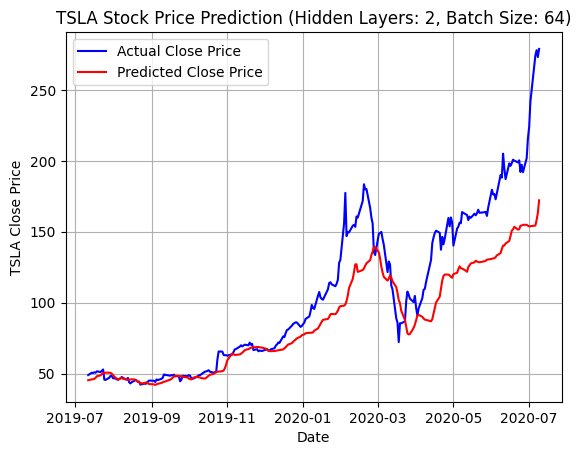

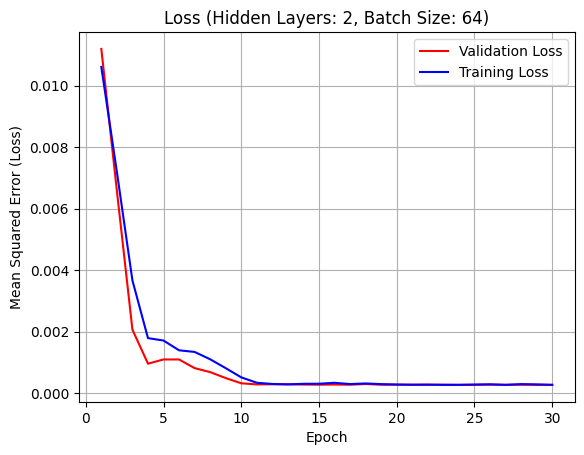

Epoch 1/30
12/12 [==============================] - 4s 60ms/step - loss: 0.0101 - val_loss: 0.0105
Epoch 2/30
12/12 [==============================] - 0s 37ms/step - loss: 0.0066 - val_loss: 0.0061
Epoch 3/30
12/12 [==============================] - 0s 33ms/step - loss: 0.0033 - val_loss: 0.0022
Epoch 4/30
12/12 [==============================] - 0s 33ms/step - loss: 0.0014 - val_loss: 7.3890e-04
Epoch 5/30
12/12 [==============================] - 0s 36ms/step - loss: 0.0013 - val_loss: 6.6155e-04
Epoch 6/30
12/12 [==============================] - 0s 36ms/step - loss: 0.0011 - val_loss: 7.8041e-04
Epoch 7/30
12/12 [==============================] - 0s 35ms/step - loss: 9.2989e-04 - val_loss: 6.2414e-04
Epoch 8/30
12/12 [==============================] - 0s 36ms/step - loss: 7.2566e-04 - val_loss: 4.7069e-04
Epoch 9/30
12/12 [==============================] - 0s 34ms/step - loss: 6.1051e-04 - val_loss: 3.7282e-04
Epoch 10/30
12/12 [==============================] - 0s 34ms/step - loss:

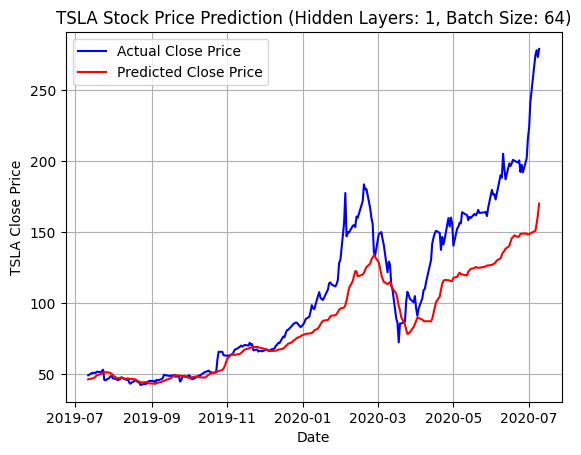

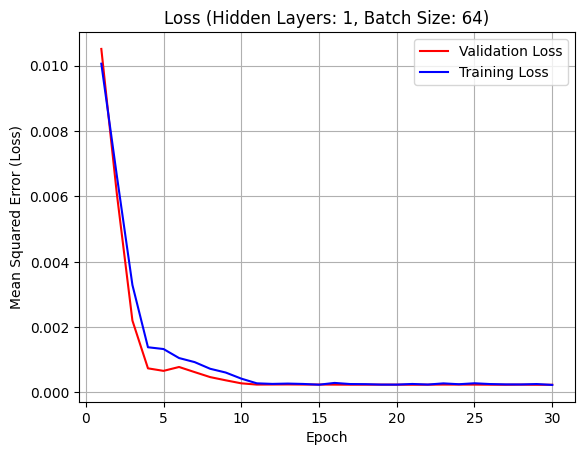

Epoch 1/30
24/24 [==============================] - 11s 188ms/step - loss: 0.0089 - val_loss: 0.0064
Epoch 2/30
24/24 [==============================] - 2s 79ms/step - loss: 0.0029 - val_loss: 0.0013
Epoch 3/30
24/24 [==============================] - 2s 77ms/step - loss: 0.0022 - val_loss: 0.0016
Epoch 4/30
24/24 [==============================] - 2s 79ms/step - loss: 0.0021 - val_loss: 0.0015
Epoch 5/30
24/24 [==============================] - 2s 80ms/step - loss: 0.0020 - val_loss: 0.0012
Epoch 6/30
24/24 [==============================] - 2s 78ms/step - loss: 0.0015 - val_loss: 6.8444e-04
Epoch 7/30
24/24 [==============================] - 3s 144ms/step - loss: 7.0739e-04 - val_loss: 3.2994e-04
Epoch 8/30
24/24 [==============================] - 3s 106ms/step - loss: 4.1379e-04 - val_loss: 3.4392e-04
Epoch 9/30
24/24 [==============================] - 2s 77ms/step - loss: 3.7240e-04 - val_loss: 3.3937e-04
Epoch 10/30
24/24 [==============================] - 2s 76ms/step - loss: 3.4

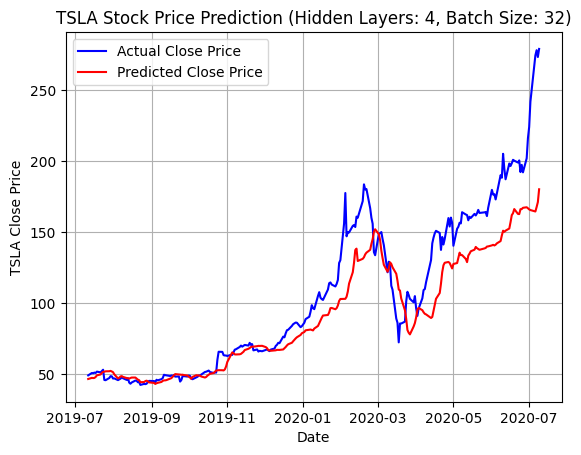

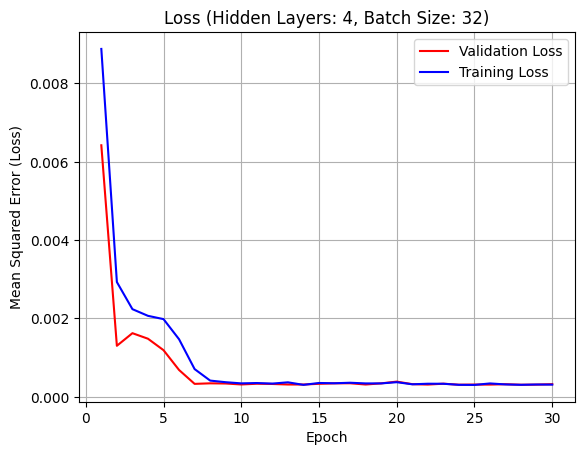

Epoch 1/30
24/24 [==============================] - 6s 65ms/step - loss: 0.0089 - val_loss: 0.0066
Epoch 2/30
24/24 [==============================] - 1s 44ms/step - loss: 0.0026 - val_loss: 9.6645e-04
Epoch 3/30
24/24 [==============================] - 1s 48ms/step - loss: 0.0016 - val_loss: 0.0011
Epoch 4/30
24/24 [==============================] - 1s 44ms/step - loss: 0.0013 - val_loss: 7.5409e-04
Epoch 5/30
24/24 [==============================] - 1s 48ms/step - loss: 9.1250e-04 - val_loss: 4.4294e-04
Epoch 6/30
24/24 [==============================] - 1s 45ms/step - loss: 4.6082e-04 - val_loss: 3.3013e-04
Epoch 7/30
24/24 [==============================] - 1s 46ms/step - loss: 3.2474e-04 - val_loss: 2.9974e-04
Epoch 8/30
24/24 [==============================] - 1s 46ms/step - loss: 3.2858e-04 - val_loss: 2.8655e-04
Epoch 9/30
24/24 [==============================] - 2s 91ms/step - loss: 3.1118e-04 - val_loss: 2.7947e-04
Epoch 10/30
24/24 [==============================] - 2s 97ms/

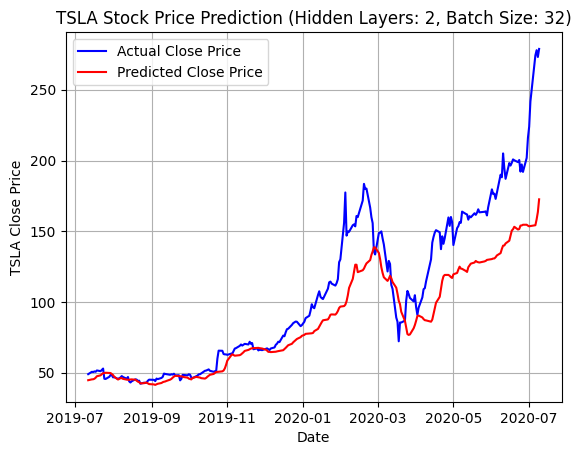

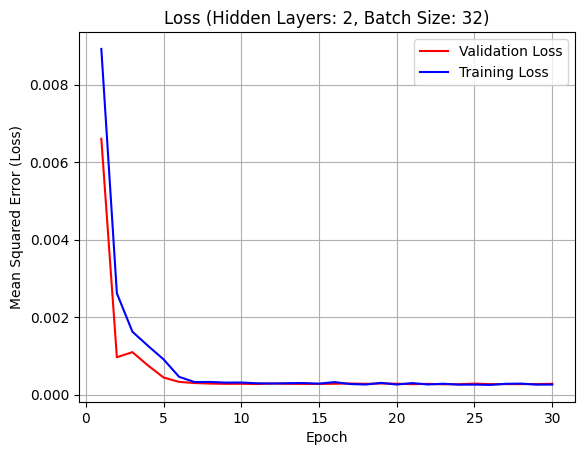

Epoch 1/30
24/24 [==============================] - 4s 44ms/step - loss: 0.0079 - val_loss: 0.0050
Epoch 2/30
24/24 [==============================] - 1s 33ms/step - loss: 0.0021 - val_loss: 6.7793e-04
Epoch 3/30
24/24 [==============================] - 1s 33ms/step - loss: 0.0011 - val_loss: 6.9238e-04
Epoch 4/30
24/24 [==============================] - 1s 37ms/step - loss: 8.6885e-04 - val_loss: 4.6403e-04
Epoch 5/30
24/24 [==============================] - 2s 64ms/step - loss: 5.7891e-04 - val_loss: 3.0370e-04
Epoch 6/30
24/24 [==============================] - 2s 68ms/step - loss: 3.2968e-04 - val_loss: 2.4777e-04
Epoch 7/30
24/24 [==============================] - 1s 59ms/step - loss: 2.5686e-04 - val_loss: 2.4902e-04
Epoch 8/30
24/24 [==============================] - 1s 34ms/step - loss: 2.4934e-04 - val_loss: 2.4120e-04
Epoch 9/30
24/24 [==============================] - 1s 34ms/step - loss: 2.6916e-04 - val_loss: 2.5637e-04
Epoch 10/30
24/24 [==============================] - 

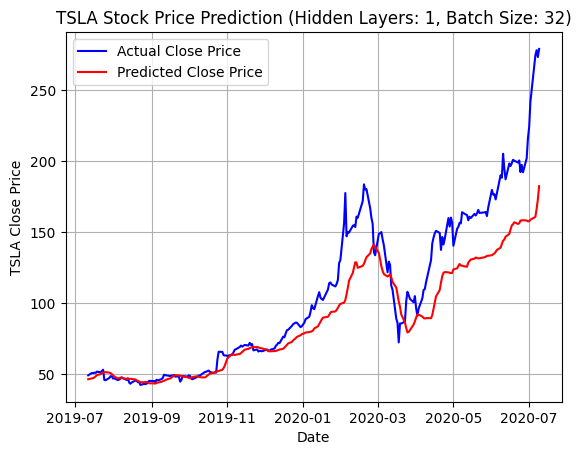

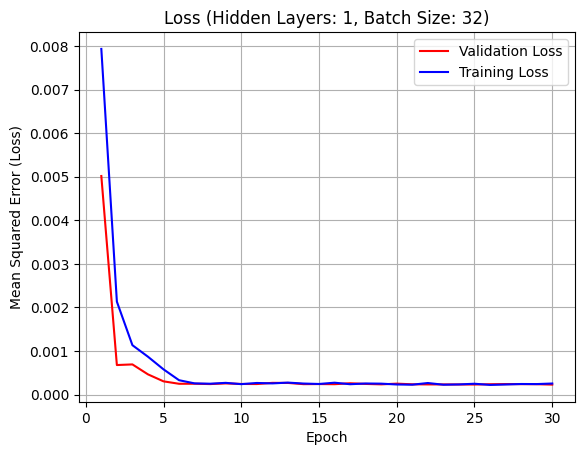

Epoch 1/30
47/47 [==============================] - 12s 90ms/step - loss: 0.0061 - val_loss: 0.0013
Epoch 2/30
47/47 [==============================] - 4s 77ms/step - loss: 0.0021 - val_loss: 0.0015
Epoch 3/30
47/47 [==============================] - 6s 126ms/step - loss: 0.0019 - val_loss: 0.0011
Epoch 4/30
47/47 [==============================] - 4s 79ms/step - loss: 7.6075e-04 - val_loss: 3.3671e-04
Epoch 5/30
47/47 [==============================] - 4s 77ms/step - loss: 3.9055e-04 - val_loss: 3.2161e-04
Epoch 6/30
47/47 [==============================] - 5s 103ms/step - loss: 3.9011e-04 - val_loss: 3.2144e-04
Epoch 7/30
47/47 [==============================] - 4s 94ms/step - loss: 3.3832e-04 - val_loss: 3.5349e-04
Epoch 8/30
47/47 [==============================] - 3s 74ms/step - loss: 3.4278e-04 - val_loss: 3.6865e-04
Epoch 9/30
47/47 [==============================] - 4s 76ms/step - loss: 3.5480e-04 - val_loss: 3.2207e-04
Epoch 10/30
47/47 [==============================] - 6s 12

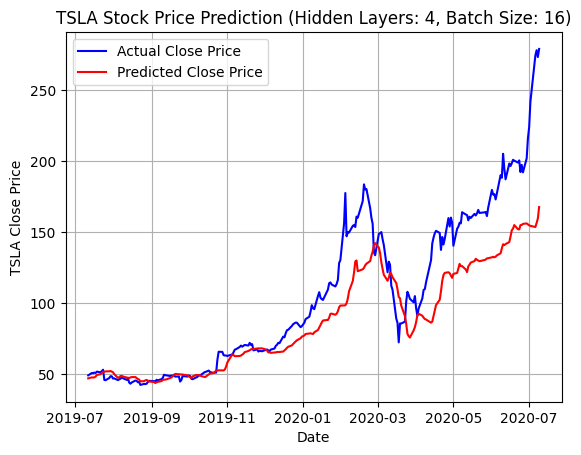

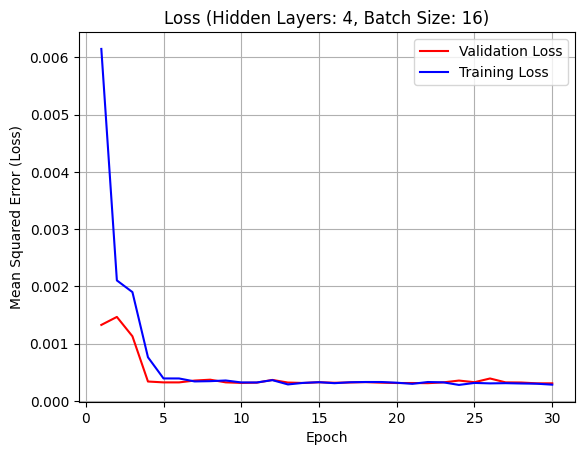

Epoch 1/30
47/47 [==============================] - 9s 96ms/step - loss: 0.0052 - val_loss: 9.9081e-04
Epoch 2/30
47/47 [==============================] - 3s 57ms/step - loss: 0.0014 - val_loss: 8.8623e-04
Epoch 3/30
47/47 [==============================] - 3s 55ms/step - loss: 7.3906e-04 - val_loss: 3.1563e-04
Epoch 4/30
47/47 [==============================] - 2s 49ms/step - loss: 3.1273e-04 - val_loss: 3.0245e-04
Epoch 5/30
47/47 [==============================] - 2s 52ms/step - loss: 3.1263e-04 - val_loss: 2.9417e-04
Epoch 6/30
47/47 [==============================] - 4s 87ms/step - loss: 2.9028e-04 - val_loss: 2.7787e-04
Epoch 7/30
47/47 [==============================] - 3s 63ms/step - loss: 2.7661e-04 - val_loss: 2.8440e-04
Epoch 8/30
47/47 [==============================] - 2s 49ms/step - loss: 2.7702e-04 - val_loss: 2.7965e-04
Epoch 9/30
47/47 [==============================] - 2s 48ms/step - loss: 2.6618e-04 - val_loss: 2.7588e-04
Epoch 10/30
47/47 [==========================

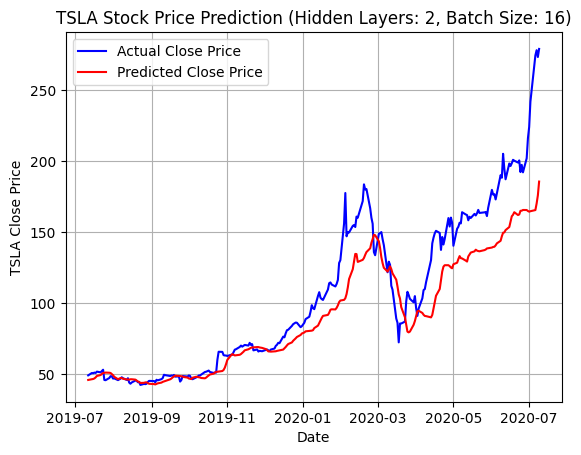

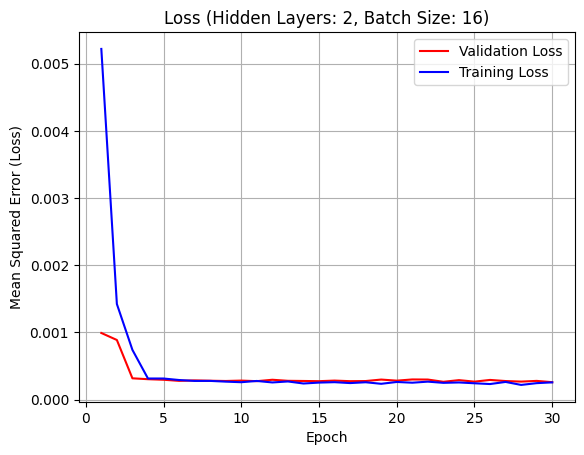

Epoch 1/30
47/47 [==============================] - 4s 41ms/step - loss: 0.0055 - val_loss: 7.9429e-04
Epoch 2/30
47/47 [==============================] - 2s 36ms/step - loss: 0.0012 - val_loss: 6.0235e-04
Epoch 3/30
47/47 [==============================] - 3s 59ms/step - loss: 6.6650e-04 - val_loss: 3.4987e-04
Epoch 4/30
47/47 [==============================] - 3s 60ms/step - loss: 3.3493e-04 - val_loss: 2.5914e-04
Epoch 5/30
47/47 [==============================] - 2s 36ms/step - loss: 2.9433e-04 - val_loss: 2.5620e-04
Epoch 6/30
47/47 [==============================] - 2s 33ms/step - loss: 2.6280e-04 - val_loss: 2.4797e-04
Epoch 7/30
47/47 [==============================] - 2s 33ms/step - loss: 2.7602e-04 - val_loss: 2.4854e-04
Epoch 8/30
47/47 [==============================] - 2s 38ms/step - loss: 2.4597e-04 - val_loss: 2.4953e-04
Epoch 9/30
47/47 [==============================] - 2s 35ms/step - loss: 2.4547e-04 - val_loss: 2.4712e-04
Epoch 10/30
47/47 [==========================

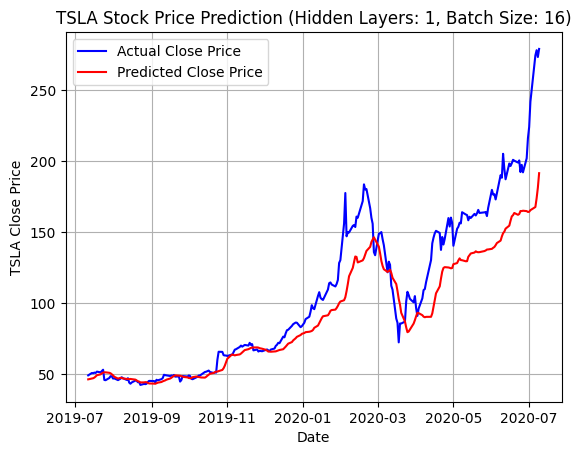

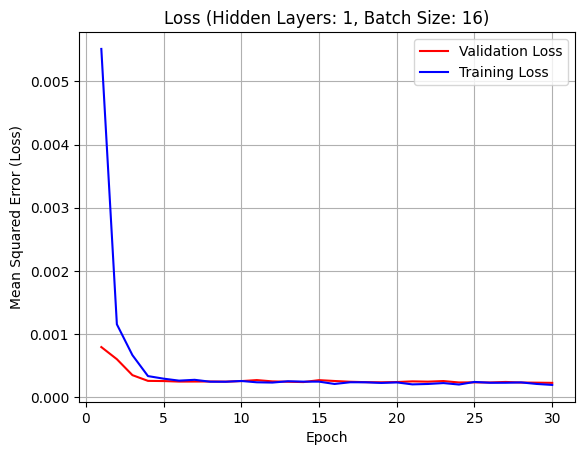

   Hidden Layers  Batch Size  Validation Loss at Epoch 30
0              4          64                     0.000311
1              2          64                     0.000270
2              1          64                     0.000236
3              4          32                     0.000322
4              2          32                     0.000281
5              1          32                     0.000229
6              4          16                     0.000305
7              2          16                     0.000258
8              1          16                     0.000228


In [14]:
# Define different model configurations
model_configs = [
    {'hidden_layers': 4, 'batch_size': 64},
    {'hidden_layers': 2, 'batch_size': 64},
    {'hidden_layers': 1, 'batch_size': 64},
    {'hidden_layers': 4, 'batch_size': 32},
    {'hidden_layers': 2, 'batch_size': 32},
    {'hidden_layers': 1, 'batch_size': 32},
    {'hidden_layers': 4, 'batch_size': 16},
    {'hidden_layers': 2, 'batch_size': 16},
    {'hidden_layers': 1, 'batch_size': 16}
]

test_start_index = len(X_train) + len(X_val)
# Store the validation loss at epoch 30 for each configuration
validation_losses_at_epoch_30 = []

# Train and evaluate models with different configurations
for config in model_configs:
    hidden_layers = config['hidden_layers']
    batch_size = config['batch_size']

    #Avtivation Function: ReLU, Drop out:50%
    model = Sequential()
    for _ in range(hidden_layers):
        model.add(LSTM(units=256, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
        model.add(Dropout(0.5))
    model.add(LSTM(units=256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1))
    #model.summary()
    #opt: ADAM, Loss: MSE
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error')

    #model.fit(X_train, y_train, epochs=10, batch_size=batch_size)
    # Store the training history
    history = model.fit(X_train, y_train, epochs=30, batch_size=batch_size, validation_data=(X_val, y_val))

    # Store the validation loss for this configuration at epoch 30
    validation_losses_at_epoch_30.append(history.history['val_loss'][29])



    #Prediction
    predicted_prices = model.predict(X_test)

    predicted_closing_prices = Y_scaler.inverse_transform(predicted_prices)
    actual_closing_prices = Y_scaler.inverse_transform(y_test)

    results_df = pd.DataFrame({
        'Actual_Close_Price': actual_closing_prices.flatten(),
        'Predicted_Close_Price': predicted_closing_prices.flatten()
    })

    #Display the results table
    print(results_df)

    # Plot the results
    plt.title(f'TSLA Stock Price Prediction (Hidden Layers: {hidden_layers}, Batch Size: {batch_size})')
    plt.plot(data.index[test_start_index + look_back:], actual_closing_prices, label='Actual Close Price', color='b')
    plt.plot(data.index[test_start_index + look_back:], predicted_closing_prices, label='Predicted Close Price', color='r')
    plt.xlabel('Date')
    plt.ylabel('TSLA Close Price')
    plt.grid(True)
    plt.legend()
    plt.show()

    # Plotting the training and validation loss for the current configuration
    plt.plot(range(1,31), history.history['val_loss'], label='Validation Loss', color='r')
    plt.plot(range(1,31), history.history['loss'], label='Training Loss', color='b')
    plt.title(f'Loss (Hidden Layers: {hidden_layers}, Batch Size: {batch_size})')
    plt.xlabel('Epoch')
    #plt.xticks(range(1, 101))
    plt.ylabel('Mean Squared Error (Loss)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Generate a table
table_data = {
    'Hidden Layers': [config['hidden_layers'] for config in model_configs],
    'Batch Size': [config['batch_size'] for config in model_configs],
    'Validation Loss at Epoch 30': validation_losses_at_epoch_30
}
df = pd.DataFrame(table_data)
print(df)

Future Prediction using model with 1 hidden layer and batch size 16

Epoch 1/15
48/48 [==============================] - 7s 8ms/step - loss: 0.0101
Epoch 2/15
48/48 [==============================] - 0s 9ms/step - loss: 0.0064
Epoch 3/15
48/48 [==============================] - 0s 8ms/step - loss: 0.0035
Epoch 4/15
48/48 [==============================] - 0s 9ms/step - loss: 0.0021
Epoch 5/15
48/48 [==============================] - 0s 9ms/step - loss: 0.0018
Epoch 6/15
48/48 [==============================] - 0s 9ms/step - loss: 0.0017
Epoch 7/15
48/48 [==============================] - 1s 17ms/step - loss: 0.0018
Epoch 8/15
48/48 [==============================] - 1s 17ms/step - loss: 0.0017
Epoch 9/15
48/48 [==============================] - 1s 17ms/step - loss: 0.0017
Epoch 10/15
48/48 [==============================] - 1s 16ms/step - loss: 0.0016
Epoch 11/15
48/48 [==============================] - 1s 16ms/step - loss: 0.0015
Epoch 12/15
48/48 [==============================] - 0s 9ms/step - loss: 0.0014
Epoch 13/15
48/48 [=========================

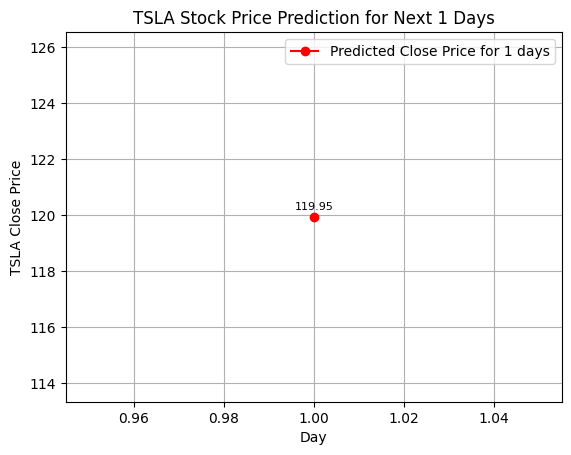

Epoch 1/15
47/47 [==============================] - 4s 26ms/step - loss: 0.0060
Epoch 2/15
47/47 [==============================] - 1s 27ms/step - loss: 0.0013
Epoch 3/15
47/47 [==============================] - 2s 38ms/step - loss: 7.0547e-04
Epoch 4/15
47/47 [==============================] - 3s 63ms/step - loss: 3.1370e-04
Epoch 5/15
47/47 [==============================] - 1s 30ms/step - loss: 2.6743e-04
Epoch 6/15
47/47 [==============================] - 1s 29ms/step - loss: 2.5856e-04
Epoch 7/15
47/47 [==============================] - 1s 28ms/step - loss: 2.6476e-04
Epoch 8/15
47/47 [==============================] - 1s 29ms/step - loss: 2.6576e-04
Epoch 9/15
47/47 [==============================] - 1s 27ms/step - loss: 2.7595e-04
Epoch 10/15
47/47 [==============================] - 1s 27ms/step - loss: 2.5409e-04
Epoch 11/15
47/47 [==============================] - 1s 29ms/step - loss: 2.4922e-04
Epoch 12/15
47/47 [==============================] - 2s 44ms/step - loss: 2.4254e-

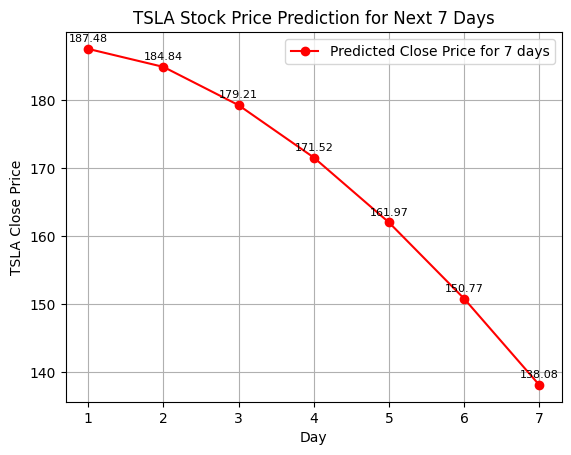

Epoch 1/15
47/47 [==============================] - 5s 52ms/step - loss: 0.0052
Epoch 2/15
47/47 [==============================] - 4s 81ms/step - loss: 9.0388e-04
Epoch 3/15
47/47 [==============================] - 3s 62ms/step - loss: 4.1435e-04
Epoch 4/15
47/47 [==============================] - 3s 70ms/step - loss: 3.8682e-04
Epoch 5/15
47/47 [==============================] - 2s 49ms/step - loss: 3.2649e-04
Epoch 6/15
47/47 [==============================] - 2s 51ms/step - loss: 2.9753e-04
Epoch 7/15
47/47 [==============================] - 5s 97ms/step - loss: 3.1095e-04
Epoch 8/15
47/47 [==============================] - 2s 48ms/step - loss: 2.9158e-04
Epoch 9/15
47/47 [==============================] - 2s 51ms/step - loss: 3.0161e-04
Epoch 10/15
47/47 [==============================] - 2s 49ms/step - loss: 3.1959e-04
Epoch 11/15
47/47 [==============================] - 2s 48ms/step - loss: 2.7475e-04
Epoch 12/15
47/47 [==============================] - 4s 91ms/step - loss: 3.12

1/1 [==============================] - 0s 20ms/step


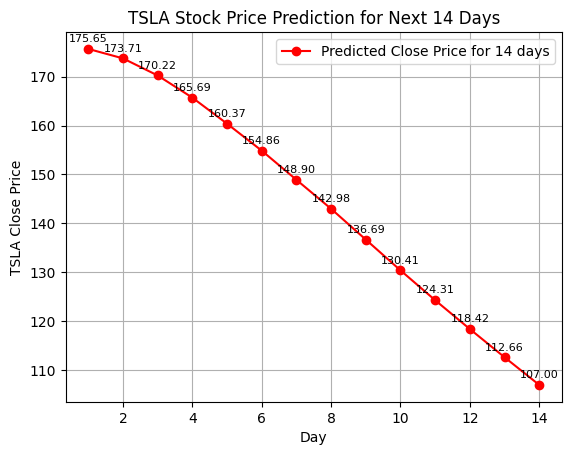

In [16]:


def make_future_predictions(model, data, look_back, horizon, Y_scaler):
    future_predictions = []
    last_data_points = data[-look_back:].flatten()

    for _ in range(horizon):
        input_data = last_data_points[-look_back:].reshape(1, look_back, 1)
        predicted_value = model.predict(input_data)
        predicted_value_unscaled = Y_scaler.inverse_transform(predicted_value)

        future_predictions.append(predicted_value_unscaled[0][0])
        last_data_points = np.append(last_data_points, predicted_value)

    return np.array(future_predictions)


look_backs = [1, 7, 14]

for look_back in look_backs:
    # Create and preprocess dataset
    X, Y = create_dataset(data[['Close']], look_back)

    X_scaler = MinMaxScaler()
    X_normalized = X_scaler.fit_transform(X)

    Y_scaler = MinMaxScaler()
    Y_normalized = Y_scaler.fit_transform(Y.reshape(-1, 1))

    # Splitting the data
    X_temp, X_test, y_temp, y_test = train_test_split(X_normalized[:, :, np.newaxis], Y_normalized, test_size=0.2, shuffle=False)
    X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, shuffle=False)

    # Build and train model
    model_new = Sequential()
    for _ in range(1):#chose model with 1 hidden layer
        model_new.add(LSTM(units=256, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
        model_new.add(Dropout(0.5))
    model_new.add(LSTM(units=256, activation='relu'))
    model_new.add(Dropout(0.5))
    model_new.add(Dense(1))

    model_new.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error')
    model_new.fit(X_train, y_train, epochs=15, batch_size=16)#chose batch size=16

    # Make future predictions
    predicted_period = make_future_predictions(model_new, X_test, look_back, look_back, Y_scaler)

    days = list(range(1, look_back + 1))
    plt.plot(days, predicted_period, label=f'Predicted Close Price for {look_back} days', marker='o', color='r')
    for day, value in zip(days, predicted_period):
        plt.annotate(f"{value:.2f}", (day, value), textcoords="offset points", xytext=(0,5), ha='center', fontsize=8)
    plt.xlabel('Day')
    plt.ylabel('TSLA Close Price')
    plt.title(f'TSLA Stock Price Prediction for Next {look_back} Days')
    plt.grid(True)
    plt.legend()
    plt.show()
